<a href="https://colab.research.google.com/github/anamika1302/ML_algo_from_scratch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we will be writing Linear regression code from scratch:
1. Load data from sklearn.datasets import make_classification, convert to asmatrix type and split.
2. Write Linear Regression class:

###    Functions:
    a) compute yhat
       - wT.X+b
    b) compute loss
       -np.sum(np.square(y_hat - y)) / (2 * len(y))
    c) compute gradient:
        - dL_dw = self.lr * np.dot(X_train.T,(y_hat -Y_train))/(2*len(Y_train))

    d) Update Weights and bias:
        - W = W - alpha * dL_dw

    e) Predict function:
      use updated weight and bias to calculate z and y_hat

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
# n_samples = 200
# X,y = make_regression(n_samples= n_samples, n_features=1, random_state=1)
# y = np.asmatrix(y).T
# X = np.asmatrix(X)
# Xtrain, Ytrain, Xtest, Ytest = X[::2], y[::2], X[1::2], y[1::2]

In [4]:
X,y = make_regression(n_samples=100, n_features = 1, random_state=1)
X = np.asmatrix(X)
y = np.asmatrix(y).T

X_train, X_test, Y_train,Y_test = train_test_split(X,y, test_size=0.2, random_state= 1)
X_train.shape

(80, 1)

In [5]:
class Linear_regression:

  def __init__(self,learning_rate,alpha,epochs) -> None:
    self.lr = learning_rate
    self.alpha = alpha
    self.n_epoch = epochs

  def mse_loss(self, y_hat, y):
    loss = np.sum(np.square(y_hat - y)) / (2 * len(y))
    return loss

  def calculate_gradient_dL_dw(self,y_hat,Y_train,X_train):
    dL_dw = self.lr * np.dot(X_train.T,(y_hat -Y_train))/(2*len(Y_train))
    return dL_dw

  def fit(self, X_train, Y_train):
    n_samples, n_features = X.shape
    loss_hist = np.zeros(self.n_epoch)
    w = np.mat(np.zeros((n_features, 1)))
    for i in range(self.n_epoch):
      y_hat = np.dot(X_train,w)
      loss = self.mse_loss(y_hat,Y_train)
      loss_hist[i] = loss
      dL_dw = self.calculate_gradient_dL_dw(y_hat,Y_train,X_train)
      w = w- self.alpha * dL_dw
    return w,loss_hist


  def predict(X_test, W):
      y_pred = np.dot(X_test,W)
      return y_pred



In [6]:
regressor = Linear_regression(learning_rate=0.01, alpha=0.01, epochs=100)
w, loss_hist = regressor.fit(X_train,Y_train)
y_pred = np.dot(X_test,w)
mse = regressor.mse_loss(y_pred, y_pred)


Text(0, 0.5, 'Error')

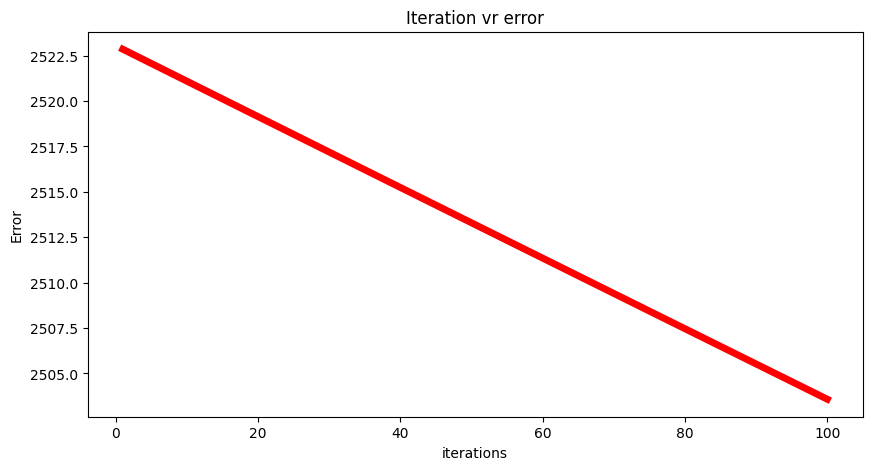

In [7]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(loss_hist)+1),loss_hist,color='red',linewidth = 5)
plt.title("Iteration vr error")
plt.xlabel("iterations")
plt.ylabel("Error")